# **Introduction**
We have decided to inspect the data hidden in data.
In every year of the competition, there are numerous notebooks that analyse the respondents’ answers to surveys. So to challenge ourselves, we've instead tried to see what we can learn from the notebooks of kagglers which participated in past kaggle survey competitions and from the surveys themselves.

These were our main topics of focus:

    i) Survey question analysis: What kinds of questions are posed by the survey; Can they be grouped into themes and do these themes change over time?

    ii) Competition notebooks analysis: Which themes were the competition participants most often interested in? What languages and libraries did they use in their notebooks?
    
    iii) The audience component: Which notebooks did the audience find most engaging? Does the choice of theme or language or libraries or the number of views or votes correlate significantly with success?

Continue reading to find the answers to all these questions.. and more.

# **Data acquisition**

The nature of the work we have decided to undertake required us to generate our own datasets. It was one of the main efforts of our work and a good play. This section gives an overview of this process. **# TODO ROK, a je res overview? ** The **ETL** (*extract-transform-load*) scraping code we used is written in Python and is publicly accessible in our GitHub repository: https://github.com/moratsam/kaggle-survey-2022, we invite you ta take a look at it. **# TODO make public.**

We have compiled data about every kernel that participated in any Kaggle Survey Competition since 2017, when the annual survey began. As our notebook analyses data from different points of view, we have ordered this data into several distinct datasets, each of which was useful in obtaining answers to our questions on at least one of the topics.

The obtained datasets are briefly overviewed below.

   
* **notebooks.zip**

   Contains 770 raw notebooks saved as either `ipynb` or `Rmd`. Seven notebooks could not be executed neither in Python nor in R, so they were given the extension `unknown_format.txt`. The name of each file is the `notebook_id` as listed on `kaggle.com` and matches `notebook_id` in the file `all_kernels.csv`, which is described below. Among other things, this dataset was used to obtain a per-notebook list of imported libraries, as well as the questions that were addressed by each notebook.
   
   TODO ROK, a je bil tukaj uporabljen scraping? dejmo ga omenit. scraping česa? a smo tu uporabili un metadata?


* **all_kernels.csv**
   
   This is in effect the main dataset we used in our project. For every kernel it gives id, notebook_id, title, creation date, evaluation date, made public date, competition participation year, url, used language (mainly R or Python), list of datasets it used, medal, list of used libraries, keywords, tags, tier, questions, topic, comments, the number of views it received, votes.
   
   TODO tukaj bi lahko za vsak stolpec povedali od kje pride data - to se sigurno izjemno ceni, da je naš dataset potem lahko uporaben tudi drugim! Da niso stolpci le neka cryptic imena za katera se ne ve od kje so dobili podatke.
   A un stolpec ki smo ga sami delali smo vrgli ven?


* **all_questions.json**
   
   Contains all Kaggle Survey questions from the years 2017-2022. In the year 2017, the survey questions were unnumbered, so we numbered them ourselves, keeping the original order and using zero-based indexing. Surveys 2018-2022 have numbered questions, so they were taken unchanged.


* **question_map.csv**
   
   Looking at survey questions over several years, one can note that certain questions repeat. For example, every year's survey contains a question `What is your age`. All such repetitions are captured in this dataset. For each unique question, the question number and the survey year where this question appears is given. The question numbers are described in the preceding paragraph `sorted_questions_all.json`. Certain questions are worded differently but functionally identical. If such questions were joined, a note was added, to alert other users of this dataset.



# **Survey questions analysis**

Counting every year's questions which contain the word "cloud", we arrive at the following result, which correlates very nicely with the growing popularity of cloud solutions:


In [1]:
import json
import os
import numpy as np
import pandas as pd
import string
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud

{2017: 0, 2018: 2, 2019: 3, 2020: 3, 2021: 4, 2022: 4}


[Text(0.5, 1.0, "#questions containing the word 'cloud'")]

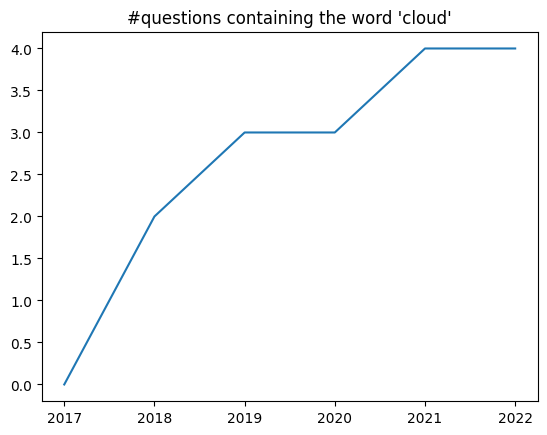

In [2]:
with open('kaggle-survey-historical-meta/all_questions.json') as f:
    all_qs = json.load(f)

cloud_cnts = {year: 0 for year in range(2017, 2023)}
for year in all_qs:
    for question in all_qs[year].values():
         if 'cloud' in question:
             cloud_cnts[int(year)] += 1

print(cloud_cnts)
s = pd.Series(cloud_cnts)
sns.lineplot(x=s.index, y=s).set(title="#questions containing the word 'cloud'")


Plotting the choices given by the surveys in answer to the question`Which types of specialized hardware do you use on a regular basis?` *[1]*, we arrive at the following heatmap:

<AxesSubplot:ylabel='Hardware'>

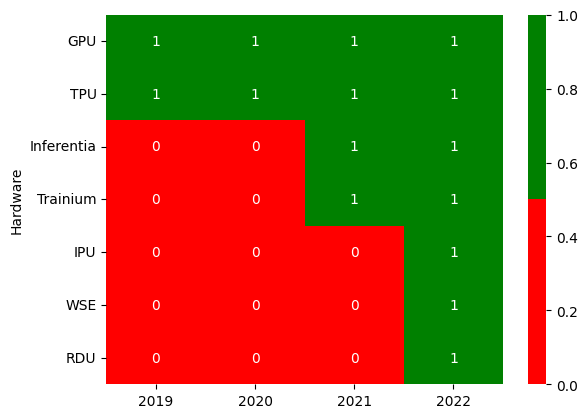

In [3]:
hw = pd.read_csv('question-analysis/hardware.csv')
hw = hw.set_index('Hardware')

sns.heatmap(
    hw, 
    annot=True,
    cmap=["red","green"],
)

Plotting the choices given by the surveys when asking about the usage of machine learning frameworks *[2]*, we arrive at the following heatmap:



In [4]:
ml_frameworks = pd.read_csv('question-analysis/ml_frameworks.csv')
ml_frameworks = ml_frameworks.set_index('Framework')

ml_frameworks



,2018,2019,2020,2021,2022
Framework,,,,,
Scikit-Learn,1,1,1,1,1
TensorFlow,1,1,1,1,1
Keras,1,1,1,1,1
PyTorch,1,1,1,1,1
Spark MLlib,1,1,0,0,0
H20,1,0,1,1,0
Fast.ai,1,1,1,1,1
Mxnet,1,0,1,1,0
Caret,1,1,1,1,1


<AxesSubplot:ylabel='Framework'>

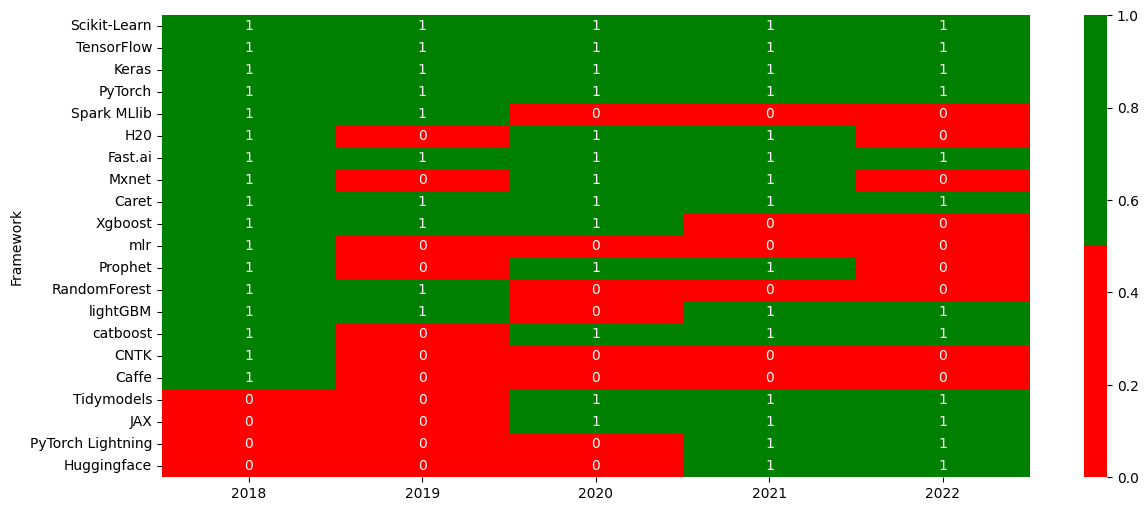

In [5]:
plt.figure(figsize=(14,6))
sns.heatmap(
    ml_frameworks, 
    annot=True,
    cmap=["red","green"],
)


* Looking at the choices given to answer the question `Which of the following natural language processing (NLP) methods do you use on a regular basis?`, the only change from 2018 to 2022, was the model GPT-2 to GPT-3.

*  Looking at the choices given to answer the question `Which categories of computer vision methods do you use on a regular basis?`, we see a novel choice appear for the first time in 2022: `Vision transformer networks (ViT, DeiT, BiT, BEiT, Swin, etc)`. As the Kaggle survey team decided it's getting enough attention to put it into the question, it would be interesting too see if the method will stay in the question as well as in popularity in the next survey.

# **Competition notebooks analysis**

In [6]:
#df = pd.read_csv('../input/all-kernels-cleaned/all_kernels_cleaned.csv')
df = pd.read_csv('kaggle-survey-historical-meta/all_kernels.csv')

## **1) General**

### Popular Tags used by participants
In this plot we examine which are the most popular libraries used by participants in their notebooks.

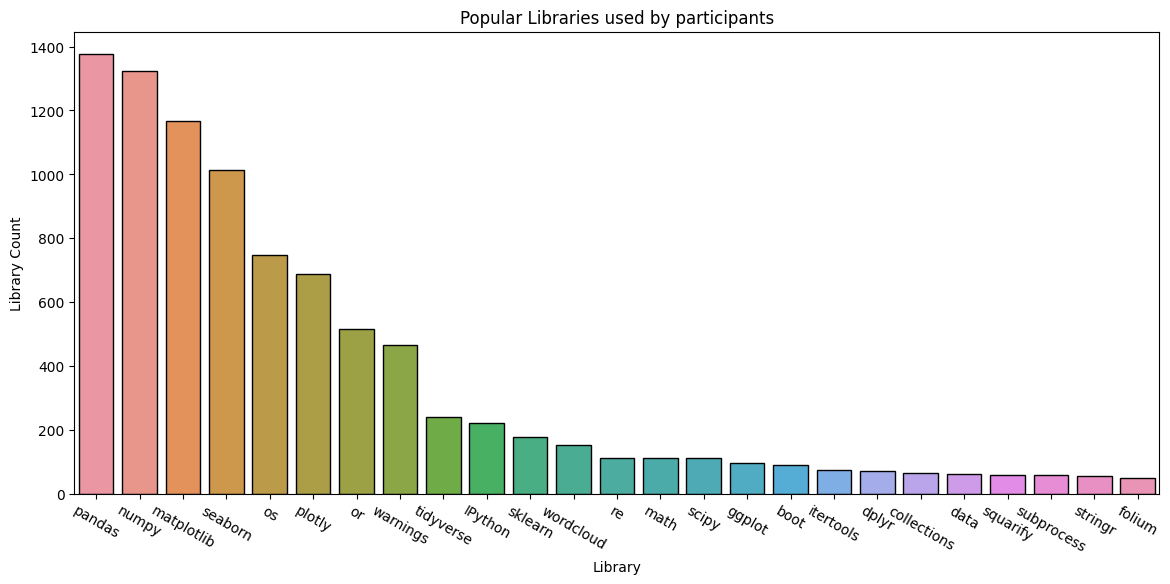

In [7]:
libs_arr = []
for index, row in df.iterrows():
        libs_arr.append(row['libs'])
        
libs = ' '.join(libs_arr).translate(str.maketrans('', '', string.punctuation)).split()
libs_count = Counter(libs)

libs_df = pd.DataFrame(libs_count.items(), columns = ['Library', 'Library Count'])
libs_df = libs_df.sort_values(by=['Library Count'], ascending = False).head(25)

plt.figure(figsize=(14,6))
libs_plot = sns.barplot(data=libs_df, 
                        x='Library',
                        y='Library Count',
                        edgecolor='black')
plt.xticks(rotation=330)
libs_plot.set(title='Popular Libraries used by participants')

plt.show()

- The five most popular libraries used are pandas (used 452 times), numpy (used 441 times), matplotlib (used 385 times), seaborn (used 340 times) and plotly (used 239 times), which are all python libraries.
- The most popular R libraries are tidyverse (used 85 times), ggplot (used 62 times) and dplyr (used 51 times)

## 

Draw a chart: Št. izdanih notebookov po letih

<AxesSubplot:xlabel='year', ylabel='count'>

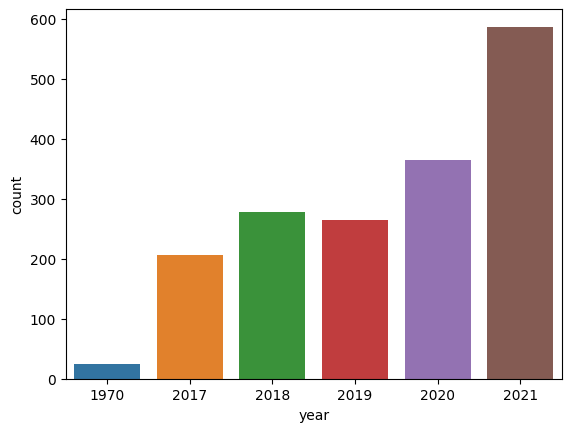

In [8]:
# remove rows where year is 2022
dfWithout2022 = df.loc[df['year'] != 2022]

# create a count series
countsPerYear = dfWithout2022.year.value_counts()

# draw a lineplot
# sns.lineplot(x=countsPerYear.index, y=countsPerYear).set(title="# of notebooks per year")

sns.countplot(x=dfWithout2022["year"])

Draw a chart: št kaggle tiersov po letih

<AxesSubplot:xlabel='year', ylabel='tierCount'>

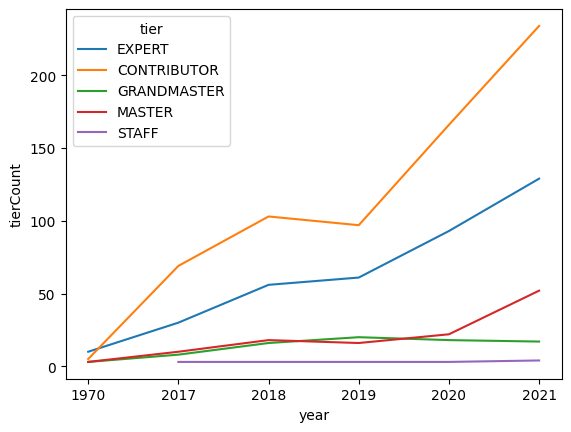

In [9]:
# create a tier count data frame
tierCount = dfWithout2022.groupby('year').tier.value_counts().rename("tierCount")

# turn created multiindex to two columns
tierDf = tierCount.reset_index()
tierDf = tierDf.query("year != 2022")
tierDf['year'] = tierDf['year'].apply(str)

# tierDf.head()


flights_wide = tierDf.pivot(index="year", columns="tier", values="tierCount")
flights_wide.head()

# res.dtypes
sns.lineplot(data=tierDf, x = "year", y = "tierCount", hue = "tier")
# sns.lineplot(data=flights_wide)


# sns.relplot(data=flights_wide, x="year", y="tierCount", hue="tierCount", kind="line")
# sns.relplot(data=flights_wide, kind="line")

## **2) Text**

### **Kernel titles: popular words**

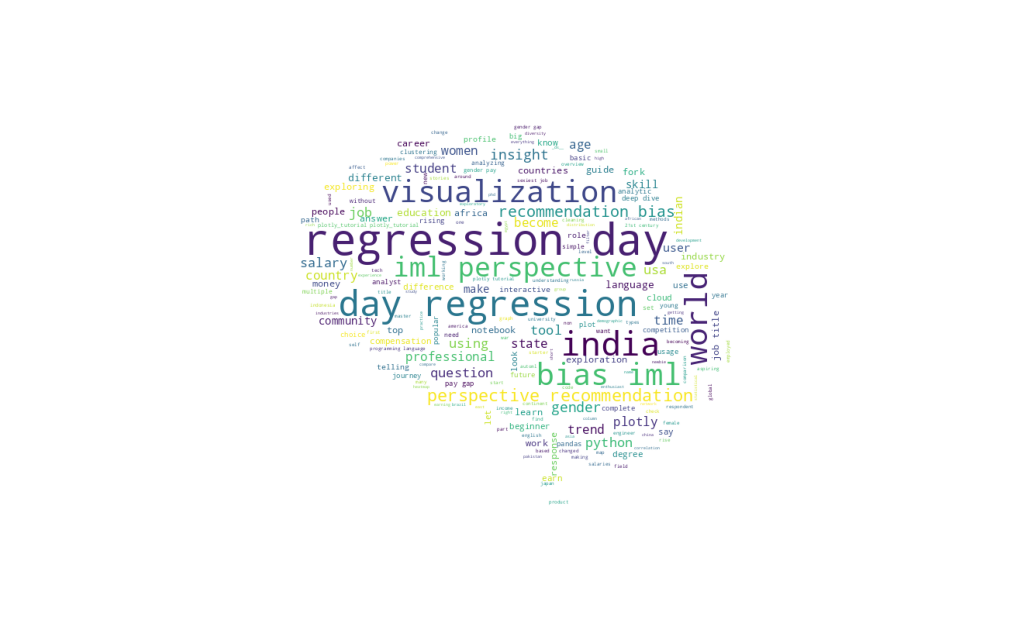

In [21]:
title_corpus = ' '.join(df['title']).lower()

mask = np.array(Image.open('./brain.webp'))

ignorewords = ['kaggler', 'kaggle', 'data', 'scientist', 'survey', 'science', 'analysis', 'story', '2022', '2021', '2020', '2019', '2018', '2017', 'machine', 'learning', 'challenge', 'eda', 'results']
for common in ignorewords:
    title_corpus = title_corpus.replace(common, "")
    
title_wordcloud = WordCloud(background_color='white', height=200, width=4000,min_word_length=3, mask=mask).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

### Popular Tags used by participants
In the next plot we examine which are the most popular tags used by participants.

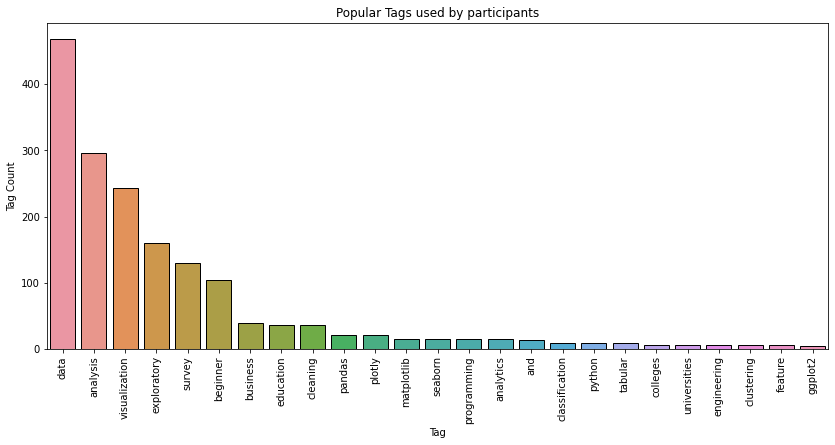

In [11]:
tags_arr = []
for index, row in df.iterrows():
        tags_arr.append(row['tags'])
        
tags = ' '.join(tags_arr).translate(str.maketrans('', '', string.punctuation)).split()
tags_count = Counter(tags)

tags_df = pd.DataFrame(tags_count.items(), columns = ['Tag', 'Tag Count'])
tags_df = tags_df.sort_values(by=['Tag Count'], ascending = False).head(25)

plt.figure(figsize=(14,6))
tags_plot = sns.barplot(data=tags_df, 
                        x='Tag',
                        y='Tag Count', 
                        edgecolor='black')
plt.xticks(rotation=90)
tags_plot.set(title='Popular Tags used by participants')

plt.show()
    

- The five most popular tags used are data (used 469 times), analysis (used 296 times), visualization (used 243 times), exploratory (used 161 times) and survey (used 130 times). We can see they are all related to the type of competition.

- More telling are the tags not directly related to competition type. Of those, the top five are beginner (used 105 times), business (used 39 times), education (used 36 times), cleaning (used 36 times) and programming (used  times).

## **3) Notebook Success**

### **Corelation between success parameters**
There are a few parameters with which one can measure the success of a notebook. They are the number of votes, comments and views a notebbok gets, and also the type of medal it was awarded (it it got one). These parameters are probably correlated, and below we explore what this correlation looks like.

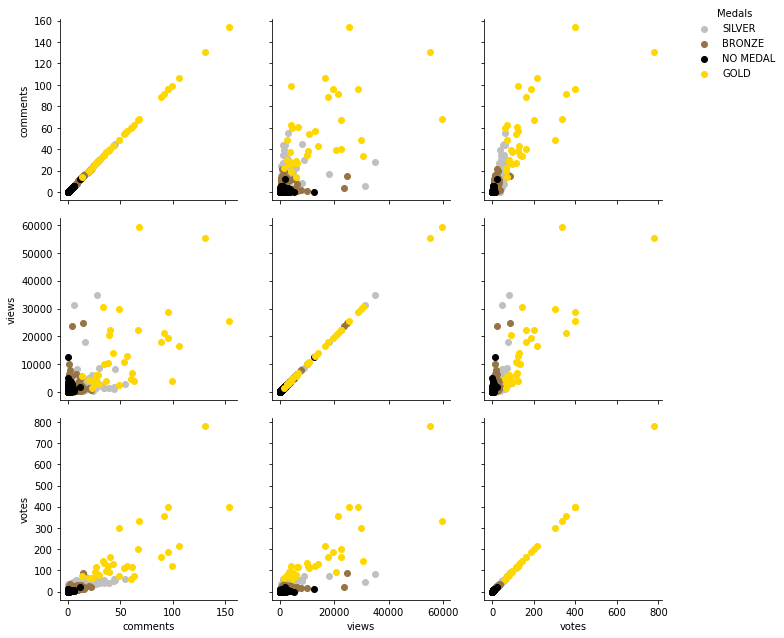

In [12]:
success_df = df[["medal","comments","views",'votes']]
success_df = success_df.replace(np.nan, 'NO MEDAL')

success_plot = sns.PairGrid(data=success_df,
                            hue = 'medal',
                            palette= ['#C0C0C0', '#967444', 'black', 'gold'])
success_plot.map(plt.scatter)
success_plot.add_legend(loc='upper right', title='Medals')
success_plot.fig.set_size_inches(11,9)

plt.show()

- Views vs Votes: Notebooks with more views seem to also get more comments, although there are also cases of notebooks with lots of views and not many comments. Most of the highest viewed notebooks also have a medal. 
- Views vs Comments: Here the correlation doesn't seem to be strong. There exist notebooks with lots of comments and fewer views and vice-versa. The notebooks with most views and comments combined also recieved a gold medal.
- Votes vs Comments: Notebooks with more votes also get more comments. The notebooks with most votes and comments combined also recieved a gold medal.

### **Medals won by Kaggle tier**
In this graph we explore the corelation between Kaggle tiers and medals won. As some tiers are bigger than others, we don't show the absolute medal counts by each tier. Instead we show the data as what percentage of kagglers in each tier won a medal.

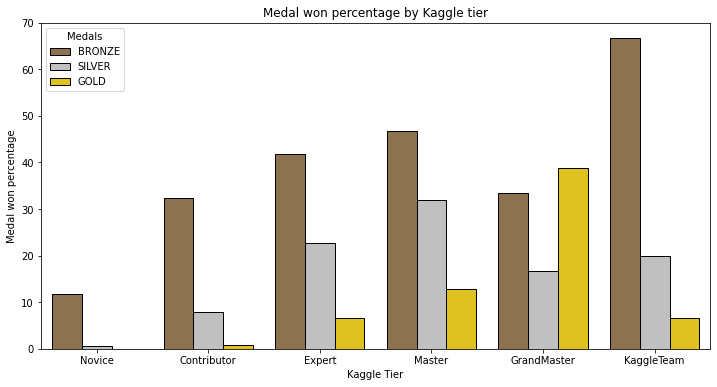

In [13]:
tiers_medals_df = df[['tier','medal']]

tiers_medals_df = tiers_medals_df.groupby('tier').medal.value_counts().rename('medalCount').reset_index()

mapp = {0:"Novice", 1 : "Contributor", 2 : "Expert", 3 : "Master", 4 : "GrandMaster", 5 : "KaggleTeam"}
tiers_medals_df['tier'] = tiers_medals_df["tier"].apply(lambda x : mapp[x])

tiers_medals_df['medalCount'] = np.where(tiers_medals_df.tier == 'Contributor',100*tiers_medals_df.medalCount/225, tiers_medals_df.medalCount)
tiers_medals_df['medalCount'] = np.where(tiers_medals_df.tier == 'Novice',100*tiers_medals_df.medalCount/162 , tiers_medals_df.medalCount)
tiers_medals_df['medalCount'] = np.where(tiers_medals_df.tier == 'Expert',100*tiers_medals_df.medalCount/136, tiers_medals_df.medalCount)
tiers_medals_df['medalCount'] = np.where(tiers_medals_df.tier == 'Master',100*tiers_medals_df.medalCount/47, tiers_medals_df.medalCount)
tiers_medals_df['medalCount'] = np.where(tiers_medals_df.tier == 'GrandMaster',100*tiers_medals_df.medalCount/36, tiers_medals_df.medalCount)
tiers_medals_df['medalCount'] = np.where(tiers_medals_df.tier == 'KaggleTeam',100*tiers_medals_df.medalCount/15, tiers_medals_df.medalCount)

plt.figure(figsize=(12,6))
tiers_medals_plot = sns.barplot(data=tiers_medals_df,
                                x='tier', 
                                y='medalCount',
                                hue='medal', 
                                edgecolor='black', 
                                palette= ['#967444', '#C0C0C0', 'gold'])                
tiers_medals_plot.set(xlabel ="Kaggle Tier", 
                      ylabel = "Medal won percentage",
                      title ='Medal won percentage by Kaggle tier')
plt.legend(loc='upper left', title='Medals')

plt.show()

### **Average vote by Kaggle tier**
Here we explore how the number of upvotes is correlated to Kaggle tiers.

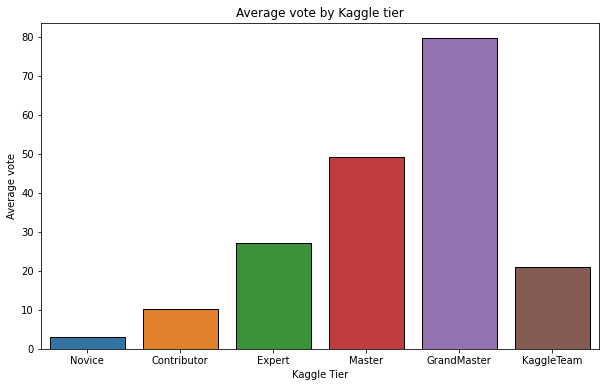

In [14]:
tiers_votes_df = df[['tier','votes']]

tiers_votes_mean_df = tiers_votes_df.groupby('tier').agg('mean')

tiers_votes_mean_df.reset_index(inplace=True)

mapp = {0:"Novice", 1 : "Contributor", 2 : "Expert", 3 : "Master", 4 : "GrandMaster", 5 : "KaggleTeam"}
tiers_votes_mean_df['tier'] = tiers_votes_mean_df["tier"].apply(lambda x : mapp[x])

plt.figure(figsize=(10,6))
tiers_votes_plot = sns.barplot(data=tiers_votes_mean_df,
                               x='tier',
                               y='votes',
                               edgecolor='black')
tiers_votes_plot.set(xlabel ="Kaggle Tier", 
                     ylabel = "Average vote",
                     title ='Average vote by Kaggle tier')

plt.show()

We can see that the more experienced a kaggler is, the higher is his average vote. Novices again fare the worst, with only 3.1 average votes. Contributors follow with 10 average votes, then KaggleTeams with 21, Experts with 27 and Masters with almost 50. GrandMasters exceed all with almost 80 votes on average.

# **Conclusion**

# Remarks
[1] *The questions are Q21, Q12, Q12, Q42, respectively.*

[2] *The questions are Q19, Q28, Q16, Q16, Q17, respectively.*